# Peak Detection 
> **Segment 5 - Erhitzen**

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

In [2]:
import plot_functions as view

### Einlesen der CSV

In [3]:
df = pd.read_csv("data/measurements.csv", sep=";", index_col="Temp./°C")
df

,C1_S1,C1_S3,C1_S5,C2_S1,C2_S3,C2_S5,C3_S1,C3_S3,C3_S5,C4_S1,...,C7_S5,C8_S1,C8_S3,C8_S5,C9_S1,C9_S3,C9_S5,C10_S1,C10_S3,C10_S5
Temp./°C,,,,,,,,,,,,,,,,,,,,,
-27.65517,NaN,-0.28629,0.29632,NaN,-0.26812,0.27996,NaN,-0.25642,0.29215,NaN,...,0.28233,NaN,-0.29654,0.30878,NaN,-0.31436,0.31452,NaN,-0.29660,0.30051
-26.65517,NaN,-0.28742,0.29556,NaN,-0.26919,0.27943,NaN,-0.27181,0.29010,NaN,...,0.28116,NaN,-0.30165,0.30859,NaN,-0.31737,0.31461,NaN,-0.29747,0.30048
-25.65517,NaN,-0.28762,0.29407,NaN,-0.26998,0.27876,NaN,-0.28293,0.28855,NaN,...,0.28004,NaN,-0.30235,0.30855,NaN,-0.31748,0.31490,NaN,-0.29811,0.30045
-24.65517,NaN,-0.28922,0.29382,NaN,-0.27078,0.27855,NaN,-0.28939,0.28784,NaN,...,0.27953,NaN,-0.30312,0.30881,NaN,-0.31861,0.31546,NaN,-0.29897,0.30092
-23.65517,NaN,-0.28983,0.29302,NaN,-0.27162,0.27881,NaN,-0.29127,0.28790,NaN,...,0.27936,NaN,-0.30380,0.30936,NaN,-0.31938,0.31627,NaN,-0.29999,0.30178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270.34483,0.48226,-0.42968,0.45576,0.44551,-0.42925,0.41479,0.47739,-0.42917,0.44651,0.43974,...,0.39977,0.49512,-0.48689,0.46568,0.53158,-0.47484,0.50892,0.50868,-0.45957,0.47928
271.34483,0.48173,-0.43157,0.45590,0.44583,-0.43115,0.41533,0.47813,-0.43063,0.44700,0.43981,...,0.40013,0.49566,-0.48951,0.46614,0.53222,-0.47693,0.50965,0.50922,-0.46179,0.47999
272.34483,0.48077,-0.43195,0.45604,0.44602,-0.43184,0.41592,0.47872,-0.43102,0.44750,0.44043,...,0.40046,0.49669,-0.49016,0.46663,0.53283,-0.47751,0.51039,0.50983,-0.46230,0.48067


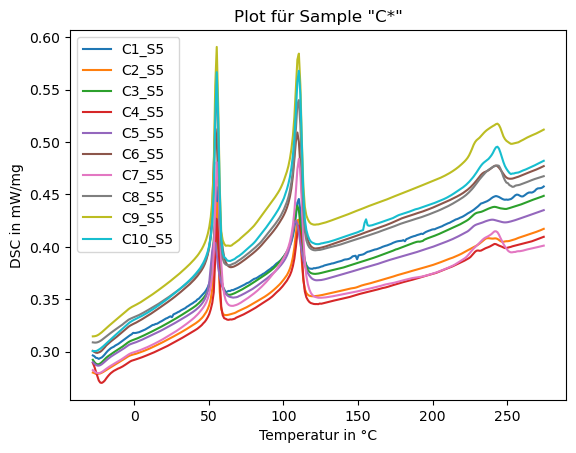

In [4]:
view.plot_columns_containing(df, 'C*', segment='S5')

## Bestimmung der Peakwerte
> **zweiter Ableitung** optimiert

In [5]:
df.reset_index(inplace=True)

In [6]:
# Peakerkennung
column = "C10_S5"

this_height = 0.3  # Grenze auf der y-Achse (0-1) 
this_prominence = 0.01 # [0.001 (mehr peaks) - 0.1 (weniger peaks)]

# Finden der Peaks
peaks, properties = find_peaks(df[column], height=this_height, prominence = this_prominence, width=1)

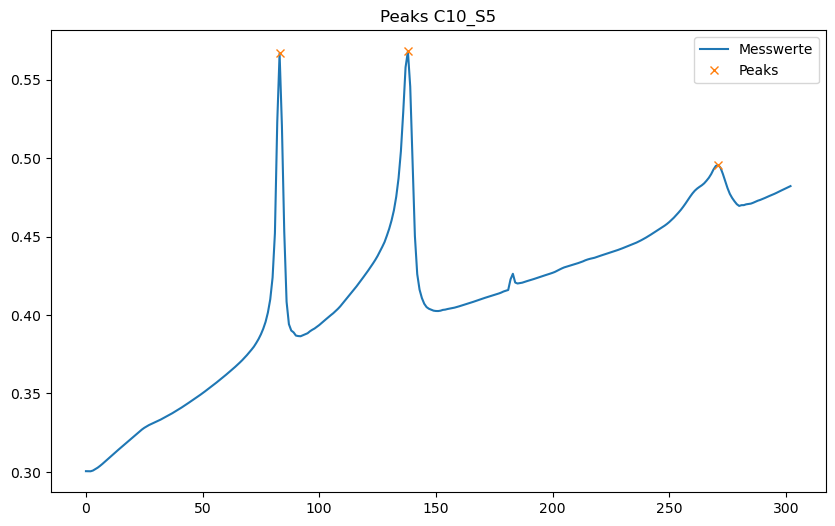

In [7]:
# Erstellen des Plots
plt.figure(figsize=(10, 6))

# Plotten der ursprünglichen Daten
plt.plot(df[column], label='Messwerte')

# Plotten der Peaks
plt.plot(peaks, df[column].iloc[peaks], "x", label="Peaks")

# Hinzufügen von Titel und Legende
plt.title(f'Peaks {column}')
plt.legend()

# Anzeigen des Plots
plt.show()

### 2. Ableitungen

In [8]:
# Berechnung der ersten Ableitung der Daten
first_derivative = np.diff(df[column])

# Berechnung der zweiten Ableitung
second_derivative = np.gradient(first_derivative)

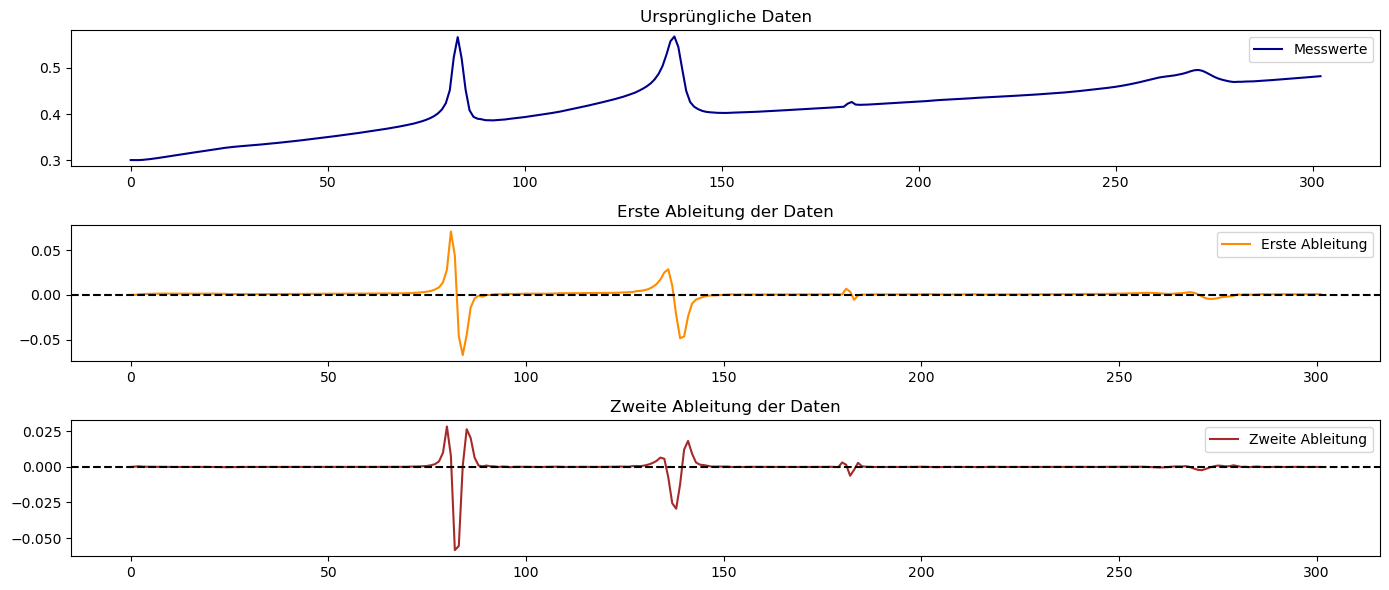

In [9]:
plt.figure(figsize=(14, 6))

# Originaldaten und Peaks ---------------------------------------------------
plt.subplot(3, 1, 1)

# Plotten der ursprünglichen Daten
plt.plot(df[column], label='Messwerte', color="darkblue")

# Hinzufügen von Titel und Legende
plt.title('Ursprüngliche Daten')
plt.legend()

# Erste Ableitung ----------------------------------------------------------
plt.subplot(3, 1, 2)
plt.plot(first_derivative, label='Erste Ableitung', color="darkorange")
plt.axhline(y=0, color='black', linestyle='--')  # Markiere die Nulllinie

plt.title('Erste Ableitung der Daten')
plt.legend()

# Zweite Ableitung ----------------------------------------------------------
plt.subplot(3, 1, 3)
plt.plot(second_derivative, label='Zweite Ableitung', color="brown")
plt.axhline(y=0, color='black', linestyle='--')  # Markiere die Nulllinie

plt.title('Zweite Ableitung der Daten')
plt.legend()

# Anzeigen des Plots --------------------------------------------------------
plt.tight_layout()
plt.show()

### 3. Start- und Endpunkte bestimmen

#### 3.1 Startpunkte

In [10]:
# Initialisierung der Listen für die Startpunkte
start_points = []

# Iteriere durch jeden Peak, um den Startpunkt zu bestimmen
for peak_index in range(len(peaks)):
    peak = peaks[peak_index]
    # Suche rückwärts nach dem letzten Punkt, bei dem der 1. Ableitung negativ ist
    start = None
    for i in range(peak, 0, -1):  # ab peak zurückwärts (theoretisch bis Anfang)
        if first_derivative[i-1] < 0:
            start = i
            break
    if start is not None:
        start_points.append(start)
    else:
        start_points.append(0)

start_points

[2, 92, 185]

#### 3.2 Endpunkte (anhand der 1. Ableitung)

In [11]:
# Initialisierung der Listen für die Endpunkte
end_points = []

# Iteriere durch jeden Peak, um den Endpunkt zu bestimmen
for peak_index in range(len(peaks)):
    peak = peaks[peak_index]
    # Suche vorwärts nach dem ersten Punkt, bei dem der 1. Ableitung positiv wird
    end = None
    for i in range(peak, len(first_derivative)): # ab peak vorwärts (theoretisch bis Ende)
        if first_derivative[i] > 0:
            end = i + 1  # Berücksichtige np.diff Verschiebung
            break
    if end is not None:
        end_points.append(end)
    else:
        end_points.append(len(df) - 1)

end_points

[93, 152, 281]

#### 3.1.1 Optimierung des Startpunktes
> anhand der 2. Ableitung *und* der Endpunkt-Höhe

In [12]:
# Series der zweiten Ableitung
second_derivative_series = pd.Series(second_derivative)
second_derivative_series

# Initialisierung von improved_start_points 
improved_start_points = []

for i in range(len(start_points)):
    this_start = start_points[i]
    this_peak = peaks[i]

    # Eingrenzung der Series
    second_der_area = second_derivative_series.loc[range(this_start+1, this_peak)]

    # Umgekehrte For-Schleife durch die Series UM die negativen Werte "am Peak" zu löschen
    for index in reversed(second_der_area.index):
        value = second_der_area[index]
        if value > 0:
            break;
        elif value <= 0:
            second_der_area = second_der_area.drop(index)

    new_start = this_start

    # Umgekehrte For-Schleife durch die Series, UM den Übergangs ins Negative zu finden (mit Toleranz) bzw. erste sehr nach an der 0
    for index in reversed(second_der_area.index):
        value = second_der_area[index]
        new_start = index
        
        if value <= 0.0001:
            if df.loc[index, column] <= df.loc[end_points[i], column]:
                break
                
    improved_start_points.append(new_start)

    print(f"\nPeak: {this_peak} \nAlter Start: {this_start}")
    print("Finaler Neuer Start:", new_start)

    print("-------------------------------------------------")


Peak: 83 
Alter Start: 2
Finaler Neuer Start: 70
-------------------------------------------------

Peak: 138 
Alter Start: 92
Finaler Neuer Start: 105
-------------------------------------------------

Peak: 271 
Alter Start: 185
Finaler Neuer Start: 253
-------------------------------------------------


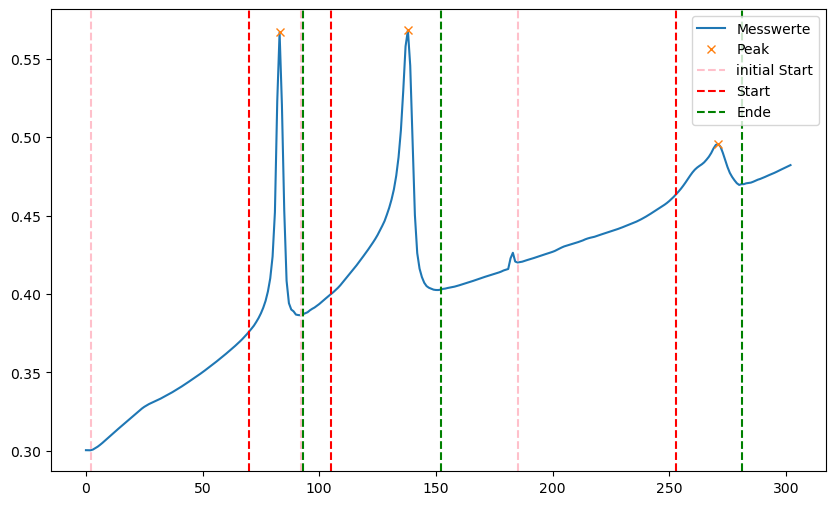

In [13]:
# Visualisierung
plt.figure(figsize=(10, 6))
plt.plot(df[column], label="Messwerte")
plt.plot(peaks, df[column][peaks], "x", label="Peak")

for start in start_points:
    plt.axvline(x=start, color='pink', linestyle='--', label="initial Start" if start == start_points[0] else "")

for start in improved_start_points:
    plt.axvline(x=start, color='r', linestyle='--', label="Start" if start == improved_start_points[0] else "")

for end in end_points:
    plt.axvline(x=end, color='g', linestyle='--', label="Ende" if end == end_points[0] else "")
plt.legend()
plt.show()

### 4. Index und Peak-Werte anpassen

In [14]:
df.set_index("Temp./°C", inplace= True)
df

,C1_S1,C1_S3,C1_S5,C2_S1,C2_S3,C2_S5,C3_S1,C3_S3,C3_S5,C4_S1,...,C7_S5,C8_S1,C8_S3,C8_S5,C9_S1,C9_S3,C9_S5,C10_S1,C10_S3,C10_S5
Temp./°C,,,,,,,,,,,,,,,,,,,,,
-27.65517,NaN,-0.28629,0.29632,NaN,-0.26812,0.27996,NaN,-0.25642,0.29215,NaN,...,0.28233,NaN,-0.29654,0.30878,NaN,-0.31436,0.31452,NaN,-0.29660,0.30051
-26.65517,NaN,-0.28742,0.29556,NaN,-0.26919,0.27943,NaN,-0.27181,0.29010,NaN,...,0.28116,NaN,-0.30165,0.30859,NaN,-0.31737,0.31461,NaN,-0.29747,0.30048
-25.65517,NaN,-0.28762,0.29407,NaN,-0.26998,0.27876,NaN,-0.28293,0.28855,NaN,...,0.28004,NaN,-0.30235,0.30855,NaN,-0.31748,0.31490,NaN,-0.29811,0.30045
-24.65517,NaN,-0.28922,0.29382,NaN,-0.27078,0.27855,NaN,-0.28939,0.28784,NaN,...,0.27953,NaN,-0.30312,0.30881,NaN,-0.31861,0.31546,NaN,-0.29897,0.30092
-23.65517,NaN,-0.28983,0.29302,NaN,-0.27162,0.27881,NaN,-0.29127,0.28790,NaN,...,0.27936,NaN,-0.30380,0.30936,NaN,-0.31938,0.31627,NaN,-0.29999,0.30178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270.34483,0.48226,-0.42968,0.45576,0.44551,-0.42925,0.41479,0.47739,-0.42917,0.44651,0.43974,...,0.39977,0.49512,-0.48689,0.46568,0.53158,-0.47484,0.50892,0.50868,-0.45957,0.47928
271.34483,0.48173,-0.43157,0.45590,0.44583,-0.43115,0.41533,0.47813,-0.43063,0.44700,0.43981,...,0.40013,0.49566,-0.48951,0.46614,0.53222,-0.47693,0.50965,0.50922,-0.46179,0.47999
272.34483,0.48077,-0.43195,0.45604,0.44602,-0.43184,0.41592,0.47872,-0.43102,0.44750,0.44043,...,0.40046,0.49669,-0.49016,0.46663,0.53283,-0.47751,0.51039,0.50983,-0.46230,0.48067


In [15]:
#  Peak-Werte an Temp./°C-Index anpassen
peaks_indices = df.index[peaks]
#start_points_indices = df.index[start_points]
start_points_indices = df.index[improved_start_points]
end_points_indices = df.index[end_points]

### 5. Visualisierung

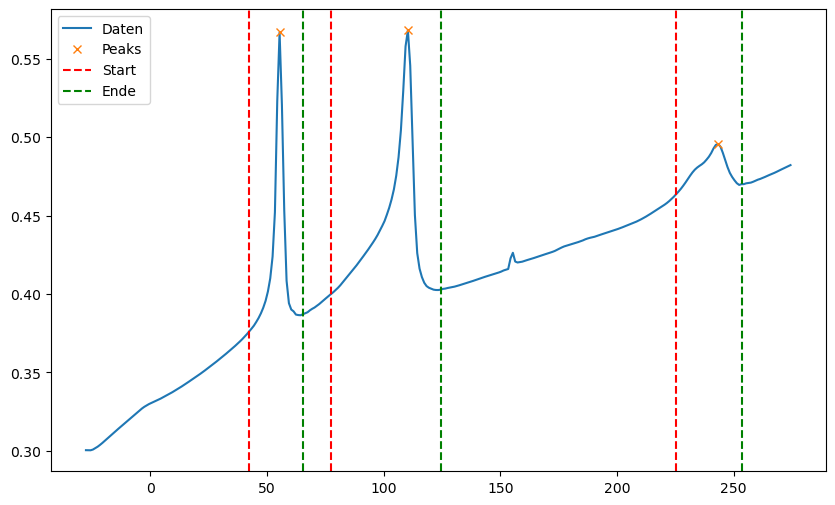

In [16]:
# Visualisierung
plt.figure(figsize=(10, 6))
plt.plot(df[column], label="Daten")
plt.plot(peaks_indices, df[column].loc[peaks_indices], "x", label="Peaks")

for start in start_points_indices:
    plt.axvline(x=start, color='r', linestyle='--', label="Start" if start == start_points_indices[0] else "")
for end in end_points_indices:
    plt.axvline(x=end, color='g', linestyle='--', label="Ende" if end == end_points_indices[0] else "")

plt.legend()
plt.show()

## All in One

In [17]:
column = "C1_S5"

df = pd.read_csv("data/measurements.csv", sep=";", index_col="Temp./°C")

# Peakerkennung ---------------------------------------------------------

this_height = 0.3  # Grenze auf der y-Achse (0-1) 
this_prominence = 0.01 # [0.001 (mehr peaks) - 0.1 (weniger peaks)]

# Finden der Peaks
peaks, properties = find_peaks(df[column], height=this_height, prominence = this_prominence, width=1)


# Berechnung der ersten Ableitung der Daten -----------------------------
first_derivative = np.diff(df[column])

# Berechnung der zweiten Ableitung
second_derivative = np.gradient(first_derivative)

# Start- und Endpunkte bestimmen ----------------------------------------------------

# Initialisierung der Listen für die Startpunkte -------------------
start_points = []

# Iteriere durch jeden Peak, um den Startpunkt zu bestimmen
for peak_index in range(len(peaks)):
    peak = peaks[peak_index]
    # Suche rückwärts nach dem letzten Punkt, bei dem der 1. Ableitung negativ ist
    start = None
    for i in range(peak, 0, -1):  # ab peak zurückwärts (theoretisch bis Anfang)
        if first_derivative[i-1] < 0:
            start = i
            break
    if start is not None:
        start_points.append(start)
    else:
        start_points.append(0)


# Initialisierung der Listen für die Endpunkte ----------------------
end_points = []

# Iteriere durch jeden Peak, um den Endpunkt zu bestimmen
for peak_index in range(len(peaks)):
    peak = peaks[peak_index]
    # Suche vorwärts nach dem ersten Punkt, bei dem der 1. Ableitung positiv wird
    end = None
    for i in range(peak, len(first_derivative)): # ab peak vorwärts (theoretisch bis Ende)
        if first_derivative[i] > 0:
            end = i + 1  # Berücksichtige np.diff Verschiebung
            break
    if end is not None:
        end_points.append(end)
    else:
        end_points.append(len(df) - 1)



# Startpunkte optimieren ----------------------------------------------
second_derivative_series = pd.Series(second_derivative)
second_derivative_series

# Initialisierung von improved_start_points 
improved_start_points = []

for i in range(len(start_points)):
    this_start = start_points[i]
    this_peak = peaks[i]

    # Eingrenzung der Series
    second_der_area = second_derivative_series.loc[range(this_start+1, this_peak)]

    # Umgekehrte For-Schleife durch die Series UM die negativen Werte "am Peak" zu löschen
    for index in reversed(second_der_area.index):
        value = second_der_area[index]
        if value > 0:
            break;
        elif value <= 0:
            second_der_area = second_der_area.drop(index)

    new_start = this_start

    # Umgekehrte For-Schleife durch die Series, UM den Übergangs ins Negative zu finden (mit Toleranz) bzw. erste sehr nach an der 0
    for index in reversed(second_der_area.index):
        value = second_der_area[index]
        new_start = index
        
        if value <= 0.0001:
            if df[column].iloc[index] <= df[column].iloc[end_points[i]]:
                break
                
    improved_start_points.append(new_start)


# --------------------------------------------------------------------------------------
peaks_indices = df.index[peaks]

init_start_points_indices = df.index[start_points]
start_points_indices = df.index[improved_start_points]
end_points_indices = df.index[end_points]

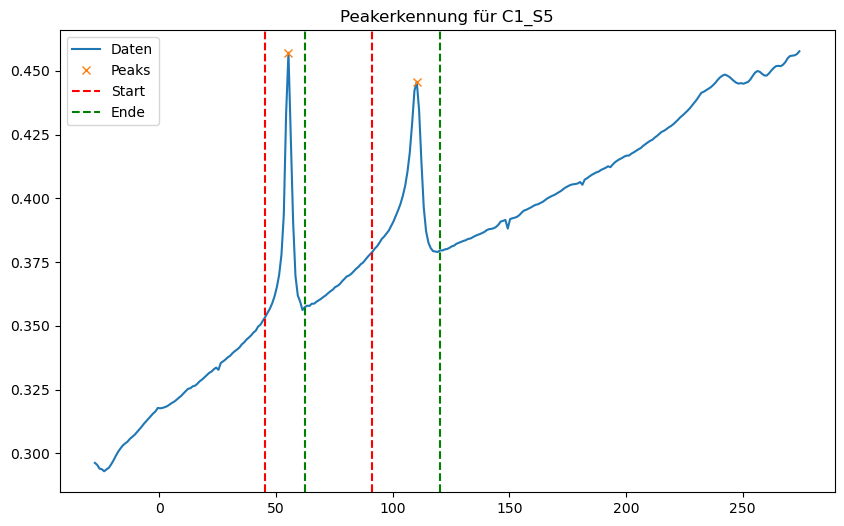

In [18]:
# Visualisierung ---------------------------------------------------------------------
plt.figure(figsize=(10, 6))
plt.plot(df[column], label="Daten")
plt.plot(peaks_indices, df[column].loc[peaks_indices], "x", label="Peaks")

for start in start_points_indices:
    plt.axvline(x=start, color='r', linestyle='--', label="Start" if start == start_points_indices[0] else "")

#for start in init_start_points_indices:
#    plt.axvline(x=start, color='pink', linestyle='--', label="init. Start" if start == init_start_points_indices[0] else "")
    
for end in end_points_indices:
    plt.axvline(x=end, color='g', linestyle='--', label="Ende" if end == end_points_indices[0] else "")

plt.title(f"Peakerkennung für {column}")
plt.legend()
plt.show()

In [19]:
print(f"Peak 1 Startpunkt:\n   X-Wert: {start_points_indices[0]}\tY-Wert: {df.loc[start_points_indices[0], column]}\n")
print(f"Peak 1 Endpunkt:\n   X-Wert: {end_points_indices[0]}\tY-Wert: {df.loc[end_points_indices[0], column]}\n")

print(f"Peak 2 Startpunkt:\n   X-Wert: {start_points_indices[1]}\tY-Wert: {df.loc[start_points_indices[0], column]}\n")
print(f"Peak 2 Endpunkt:\n   X-Wert: {end_points_indices[1]}\tY-Wert: {df.loc[end_points_indices[0], column]}")

Peak 1 Startpunkt:
   X-Wert: 45.34483	Y-Wert: 0.35341

Peak 1 Endpunkt:
   X-Wert: 62.34483	Y-Wert: 0.35735

Peak 2 Startpunkt:
   X-Wert: 91.34483	Y-Wert: 0.35341

Peak 2 Endpunkt:
   X-Wert: 120.34483	Y-Wert: 0.35735
